In [1]:
#libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
#read dataset

df=pd.read_csv('dataset/UNSW_NB15_training-set.csv')
df.head()

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.000011,udp,-,INT,2,0,496,0,90909.0902,...,1,2,0,0,0,1,2,0,Normal,0
1,2,0.000008,udp,-,INT,2,0,1762,0,125000.0003,...,1,2,0,0,0,1,2,0,Normal,0
2,3,0.000005,udp,-,INT,2,0,1068,0,200000.0051,...,1,3,0,0,0,1,3,0,Normal,0
3,4,0.000006,udp,-,INT,2,0,900,0,166666.6608,...,1,3,0,0,0,2,3,0,Normal,0
4,5,0.000010,udp,-,INT,2,0,2126,0,100000.0025,...,1,3,0,0,0,2,3,0,Normal,0


In [17]:
df.describe()

,id,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,...,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,label
count,82332.000000,82332.000000,82332.000000,82332.000000,8.233200e+04,8.233200e+04,8.233200e+04,82332.000000,82332.000000,8.233200e+04,...,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000
mean,41166.500000,1.006756,18.666472,17.545936,7.993908e+03,1.323379e+04,8.241089e+04,180.967667,95.713003,6.454902e+07,...,4.928898,3.663011,7.456360,0.008284,0.008381,0.129743,6.468360,9.164262,0.011126,0.550600
std,23767.345519,4.710444,133.916353,115.574086,1.716423e+05,1.514715e+05,1.486204e+05,101.513358,116.667722,1.798618e+08,...,8.389545,5.915386,11.415191,0.091171,0.092485,0.638683,8.543927,11.121413,0.104891,0.497436
min,1.000000,0.000000,1.000000,0.000000,2.400000e+01,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,20583.750000,0.000008,2.000000,0.000000,1.140000e+02,0.000000e+00,2.860611e+01,62.000000,0.000000,1.120247e+04,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000
50%,41166.500000,0.014138,6.000000,2.000000,5.340000e+02,1.780000e+02,2.650177e+03,254.000000,29.000000,5.770032e+05,...,1.000000,1.000000,3.000000,0.000000,0.000000,0.000000,3.000000,5.000000,0.000000,1.000000
75%,61749.250000,0.719360,12.000000,10.000000,1.280000e+03,9.560000e+02,1.111111e+05,254.000000,252.000000,6.514286e+07,...,4.000000,3.000000,6.000000,0.000000,0.000000,0.000000,7.000000,11.000000,0.000000,1.000000
max,82332.000000,59.999989,10646.000000,11018.000000,1.435577e+07,1.465753e+07,1.000000e+06,255.000000,253.000000,5.268000e+09,...,59.000000,38.000000,63.000000,2.000000,2.000000,16.000000,60.000000,62.000000,1.000000,1.000000


In [5]:
#df.dtypes

In [18]:
df.shape

(82332, 45)

In [19]:
df.isnull().values.any()
#false but observe service variable which has more - values which indicates the null values
#so we have to replace it with other labels

False

In [20]:
#lets plot the types of value in service attribute
df['service'].value_counts()

-           47153
dns         21367
http         8287
smtp         1851
ftp          1552
ftp-data     1396
pop3          423
ssh           204
ssl            30
snmp           29
dhcp           26
radius          9
irc             5
Name: service, dtype: int64

In [21]:
#lets changed the - with 'unknown' value 
df['service']=df['service'].replace('-','unknown')
df['service'].value_counts()
#good to go

unknown     47153
dns         21367
http         8287
smtp         1851
ftp          1552
ftp-data     1396
pop3          423
ssh           204
ssl            30
snmp           29
dhcp           26
radius          9
irc             5
Name: service, dtype: int64

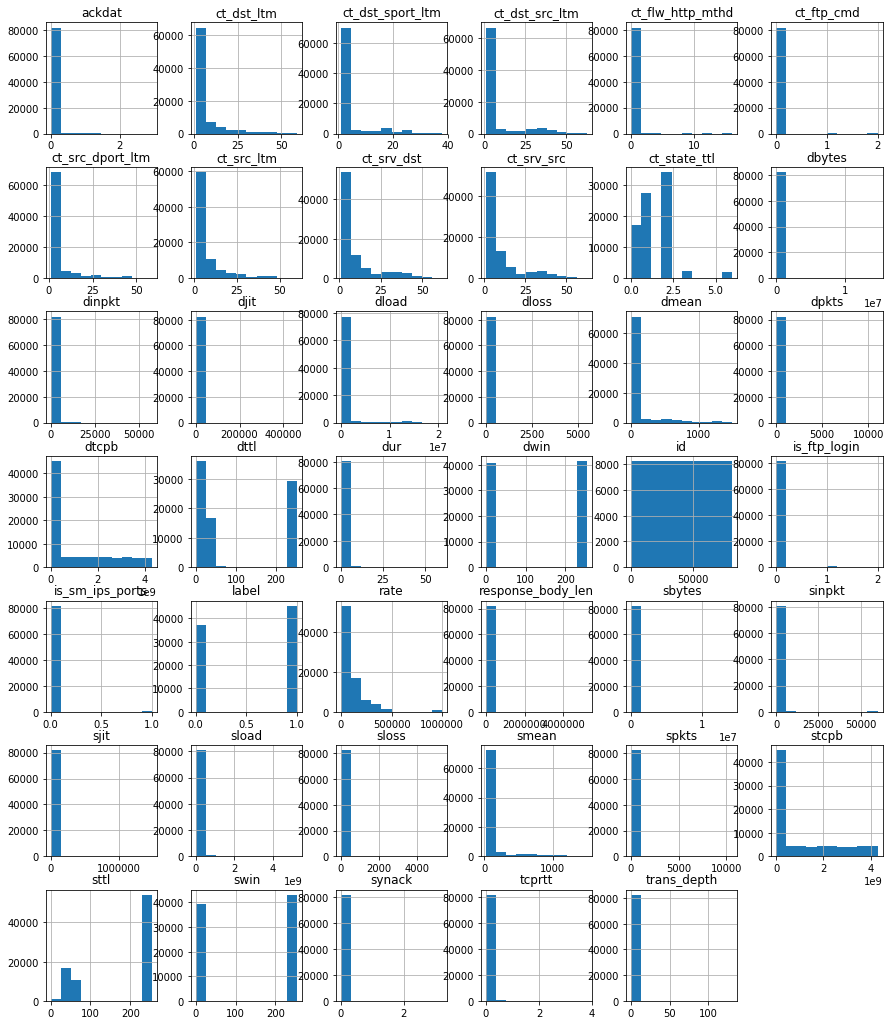

In [22]:
#histogram to see the data distribution
df.hist(figsize=(15,18))
plt.show()

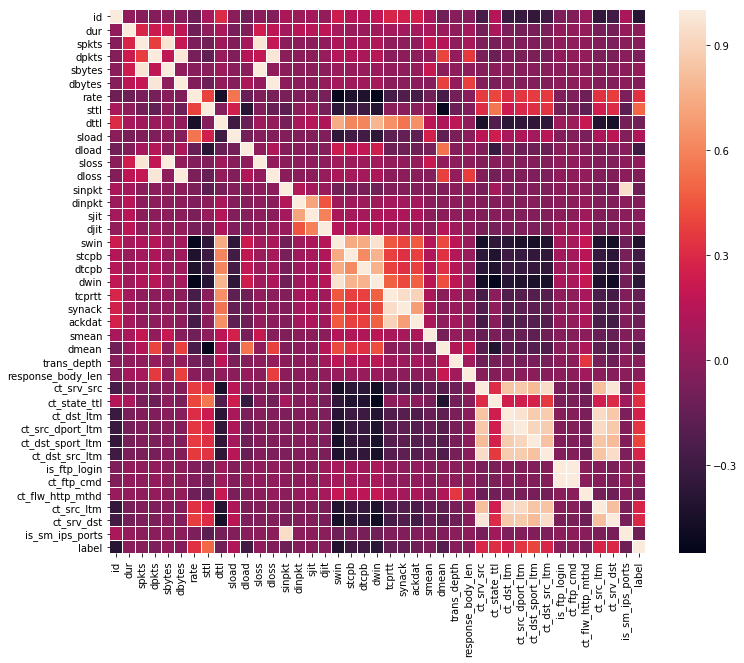

In [12]:
#correlation matrix
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(),linewidths=.01)

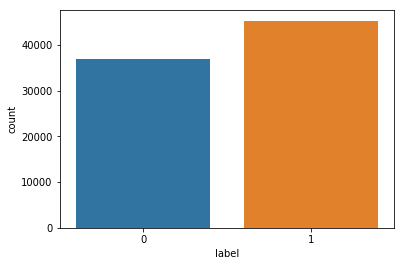

In [23]:
#count the label
#0 indicates normal
#1 indicates attacked
sns.countplot(df['label'])

#our dataset contains the equal data length

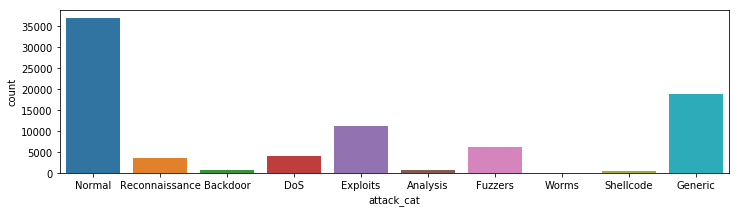

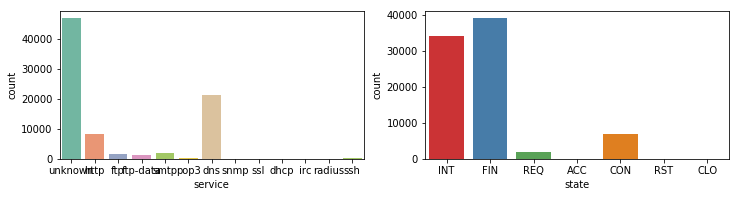

In [24]:
#lets check categorical data plot
#service,attack_cat,proto etc
ax=plt.figure(figsize=(12,3))
sns.countplot(df['attack_cat'])
plt.show()
ax=plt.figure(figsize=(12,6))
plt.subplot(2,2,1)
sns.countplot(df['service'],palette='Set2')
plt.subplot(2,2,2)
sns.countplot(df['state'],palette='Set1')
plt.show()

In [25]:
X=df.drop(columns=['label','id'])
y=df['label']

In [26]:
from sklearn.preprocessing import LabelEncoder
#train dataset
lbl=LabelEncoder()

#fetch all coumns with object data type
feature_mask=X.dtypes==object
cat_cols=X.columns[feature_mask].tolist()

#convert each label to a unique integer
X[cat_cols]=X[cat_cols].apply(lambda col:lbl.fit_transform(col))
X[cat_cols].head()

,proto,service,state,attack_cat
0,117,12,4,6
1,117,12,4,6
2,117,12,4,6
3,117,12,4,6
4,117,12,4,6


In [27]:
#split the data into train and test
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=5)
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((57632, 43), (57632,), (24700, 43), (24700,))

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,roc_auc_score

clf=LogisticRegression(C=0.5)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
print("Accurcy " + str(accuracy_score(y_test,y_pred)))
print("ROC AUC  " + str(roc_auc_score(y_test,y_pred)))
pd.DataFrame(data={'Actual':y_test,'Predicted':y_pred}).head(10)


C:\Users\Mr.Khan\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Accurcy 0.7579352226720648
ROC AUC  0.7678668518190391


,Actual,Predicted
8737,1,1
72286,0,1
78850,0,1
42816,0,0
67500,0,0
19671,1,1
61863,1,0
51958,1,1
69597,0,0
73793,0,0


In [29]:
from sklearn.ensemble import RandomForestClassifier

clf=RandomForestClassifier(n_estimators=20)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
print("Accurcy " + str(accuracy_score(y_test,y_pred)))
print("ROC AUC  " + str(roc_auc_score(y_test,y_pred)))
pd.DataFrame(data={'Actual':y_test,'Predicted':y_pred}).head(10)

#wow...both accuracy and roc auc curve is 99%

Accurcy 0.999919028340081
ROC AUC  0.9999260847069258


,Actual,Predicted
8737,1,1
72286,0,0
78850,0,0
42816,0,0
67500,0,0
19671,1,1
61863,1,1
51958,1,1
69597,0,0
73793,0,0


In [30]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[11171,     0],
       [    2, 13527]], dtype=int64)